In [1]:
print("Trend 1 - Average fare increases and varies more as you move away from urban cities into rural cities.")
print("Trend 2 - In urban cities the average cost has no correlation to demand for rides and supply of drivers.")
print("Trend 3 - Rural drivers are probably earning more revenue than urban drivers.")

Trend 1 - Average fare increases and varies more as you move away from urban cities into rural cities.
Trend 2 - In urban cities the average cost has no correlation to demand for rides and supply of drivers.
Trend 3 - Rural drivers are probably earning more revenue than urban drivers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file1 = ("raw_data/city_data.csv")
file2 = ("raw_data/ride_data.csv")

In [4]:
df1 = pd.read_csv(file1)
df1.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
df2 = pd.read_csv(file2)
df2.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
merge_df = pd.merge(df1, df2, on="city")
merge_df.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
city_info = merge_df.groupby('city')
city_ride_count = city_info['type'].count()
city_fare_sum = city_info['fare'].sum()
city_avg_fare = city_fare_sum/city_ride_count
driver_count = city_info['driver_count'].first()
city_type = city_info['type'].first()
city_df = pd.DataFrame({'Ride Count':city_ride_count,'Avg Fare':city_avg_fare,'Driver Count':driver_count,"City Type":city_type})
#city_df["Avg Fare"] = city_df["Avg Fare"].map("$ {:,.2f}".format)
city_df.head()

,Avg Fare,City Type,Driver Count,Ride Count
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [8]:
urban_df = city_df.loc[city_df['City Type']=='Urban']
urban_df.head()

,Avg Fare,City Type,Driver Count,Ride Count
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19
Arnoldview,25.106452,Urban,41,31


In [9]:
suburban_df = city_df.loc[city_df['City Type']=='Suburban']
suburban_df.head()

,Avg Fare,City Type,Driver Count,Ride Count
city,,,,
Anitamouth,37.315556,Suburban,16,9
Campbellport,33.711333,Suburban,26,15
Carrollbury,36.606000,Suburban,4,10
Clarkstad,31.051667,Suburban,21,12
Conwaymouth,34.591818,Suburban,18,11


In [10]:
rural_df = city_df.loc[city_df['City Type']=='Rural']
rural_df.head()

,Avg Fare,City Type,Driver Count,Ride Count
city,,,,
East Leslie,33.660909,Rural,9,11
East Stephen,39.053000,Rural,6,10
East Troybury,33.244286,Rural,3,7
Erikport,30.043750,Rural,3,8
Hernandezshire,32.002222,Rural,10,9


In [11]:
x_axis = int((city_df['Driver Count'].max()) *1.1)
y_axis = int((city_df['Avg Fare'].max())*1.1)


In [12]:
size = city_df['Ride Count']**1.5

In [13]:
urban = plt.scatter((urban_df['Driver Count']), (urban_df['Avg Fare']), marker="o", facecolors="gold", 
                     edgecolors="black",s=size, alpha=0.5)
suburban = plt.scatter((suburban_df['Driver Count']),(suburban_df['Avg Fare']), marker="o", facecolors="lightcoral", 
                        edgecolors="black",s=size, alpha=0.5)
rural = plt.scatter((rural_df['Driver Count']), (rural_df['Avg Fare']), marker="o", facecolors="lightskyblue", 
                     edgecolors="black",s=size,alpha=0.5)
plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rurul"), loc="best")
plt.xlabel("Driver Count")
plt.ylabel("Avg Fare")
plt.suptitle("Pyber Ride Share Data by City")
plt.title("Size Varies by Ride Count")

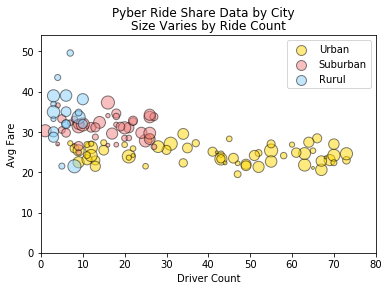

In [14]:
plt.ylim(0,y_axis)
plt.xlim(0,x_axis)
plt.show()

In [15]:
#Pie chart

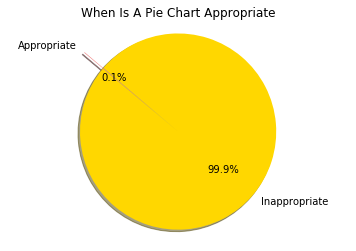

In [16]:
labels = ["Inappropriate","Appropriate"]
sizes = [99.9,0.1]
colors = ["gold", "lightcoral"]
explode = (0,0.25)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("When Is A Pie Chart Appropriate")
plt.show()

In [17]:
type_info = merge_df.groupby('type')
fare_pct = type_info['fare'].sum()/merge_df['fare'].sum()*100
ride_pct = type_info['fare'].count()/merge_df['fare'].count()*100
driver_pct = type_info['driver_count'].sum()/merge_df['driver_count'].sum()*100
type_df = pd.DataFrame({"Fare %":fare_pct,"Ride %":ride_pct,"Driver %":driver_pct}).reset_index()
type_df = type_df.rename(columns={"type":"City Type"})
type_df

,City Type,Driver %,Fare %,Ride %
0,Rural,0.969876,6.68500,5.263158
1,Suburban,12.980602,30.34954,26.315789
2,Urban,86.049521,62.96546,68.421053


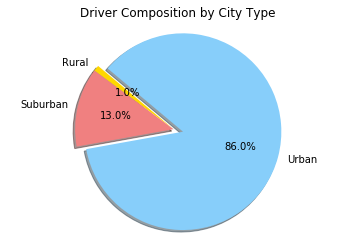

In [18]:
labels = type_df["City Type"]
sizes = type_df["Driver %"]
colors = ["gold","lightcoral","lightskyblue"]
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Driver Composition by City Type")
plt.show()

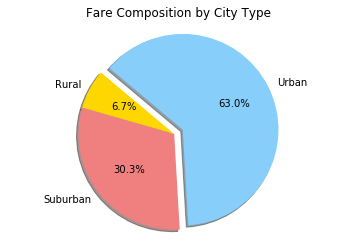

In [19]:
labels = type_df["City Type"]
sizes = type_df["Fare %"]
colors = ["gold","lightcoral","lightskyblue"]
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Fare Composition by City Type")
plt.show()

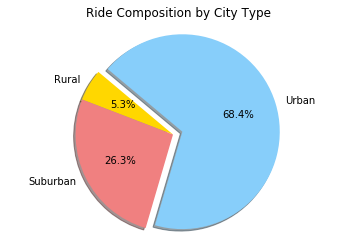

In [20]:
labels = type_df["City Type"]
sizes = type_df["Ride %"]
colors = ["gold","lightcoral","lightskyblue"]
explode = (0,0,0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Ride Composition by City Type")
plt.show()